<img src="http://www.digitalvidya.com/wp-content/uploads/2013/05/logoa5-300x95.png">

# Predictive Modelling Projects

### Use Case: Customer Lifetime Value for Online Market Place

#### What is Customer Lifetime Value?

###### CLV = Retention Time Period (RECENCY) * Number of Transactions (FREQUENCY) * Average Sale Value (MONETARY VALUE) * Profit Margin
###### How Valuable and Profitable a customer is?

### Overview of the database structure

<img src="https://i.imgur.com/HRhd2Y0.png" alt="OLIST Database" style="width: 700px;"/>

### Preparing the dataset for RFM Mearsures

Datasets to be used:
    olist_customers_dataset,
    olist_orders_dataset,
    olist_order_payments_dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_master = pd.read_csv('olist_customers_dataset.csv')
customer_master.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_master = pd.read_csv('olist_orders_dataset.csv')
orders_master.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
orderPayments = pd.read_csv('olist_order_payments_dataset.csv')
orderPayments=orderPayments[['order_id','payment_value']].drop_duplicates()
orderPayments.head()

,order_id,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71
3,ba78997921bbcdc1373bb41e913ab953,107.78
4,42fdf880ba16b47b59251dd489d4441a,128.45


In [5]:
orderPayments = pd.DataFrame(orderPayments.groupby('order_id').sum())
orderPayments.reset_index(inplace=True)

In [6]:
customer_orders = pd.merge(customer_master[['customer_id','customer_unique_id']],orders_master[['order_id','customer_id','order_purchase_timestamp']])
customer_orders.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30


In [7]:
print(customer_master.shape)
print(orders_master.shape)
print(orderPayments.shape)
print(customer_orders.shape)

(99441, 5)
(99441, 8)
(99440, 2)
(99441, 4)


In [8]:
customer_orders['order_purchase_timestamp'] = pd.to_datetime(customer_orders['order_purchase_timestamp']).dt.date
customer_orders.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29


In [9]:
customer_orders = pd.merge(customer_orders,orderPayments)
print(customer_orders.shape)
customer_orders.head()

(99440, 5)


,customer_id,customer_unique_id,order_id,order_purchase_timestamp,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,252.25


In [10]:
customer_data = customer_orders.drop(['order_id','customer_id'],axis=1)
customer_data.drop_duplicates(inplace=True)
customer_data.shape

(99306, 3)

### Recency Calculation

In [11]:
max_purchase_date = customer_orders.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
min_purchase_date = customer_orders.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
max_purchase_date.columns = ['customer_unique_id','max_purchase_date']
min_purchase_date.columns = ['customer_unique_id','min_purchase_date']
datesData = pd.merge(max_purchase_date,min_purchase_date,how='outer')
datesData.head()

,customer_unique_id,max_purchase_date,min_purchase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,2018-05-10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,2018-05-07
2,0000f46a3911fa3c0805444483337064,2017-03-10,2017-03-10
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,2017-10-12
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,2017-11-14


In [12]:
datesData['recency'] = (datesData.max_purchase_date - datesData.min_purchase_date).dt.days
datesData['age'] = (datesData.max_purchase_date.max() - datesData.min_purchase_date).dt.days
datesData.head()

,customer_unique_id,max_purchase_date,min_purchase_date,recency,age
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,2018-05-10,0,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,2018-05-07,0,163
2,0000f46a3911fa3c0805444483337064,2017-03-10,2017-03-10,0,586
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,2017-10-12,0,370
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,2017-11-14,0,337


In [13]:
datesData.shape

(96095, 5)

### Frequency Calculation

In [14]:
frequency = customer_orders.groupby('customer_unique_id').order_id.count().reset_index()
frequency.columns = ['customer_unique_id','Frequency']

In [15]:
frequency.shape

(96095, 2)

In [16]:
frequency.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


### Monetary value Calculation

In [17]:
monetary_value = customer_orders.groupby('customer_unique_id').payment_value.mean().reset_index()

In [18]:
monetary_value.columns=['customer_unique_id','average_payment_value']
monetary_value.head()

,customer_unique_id,average_payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [19]:
monetary_value.shape

(96095, 2)

### Theoretical Customer Lifetime Value

In [20]:
dataset = pd.merge(datesData[['customer_unique_id','recency','age']],frequency)
dataset = pd.merge(dataset,monetary_value)

In [21]:
print(dataset.shape)
dataset.head()

(96095, 5)


,customer_unique_id,recency,age,Frequency,average_payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,0,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,163,1,27.19
2,0000f46a3911fa3c0805444483337064,0,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,0,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,0,337,1,196.89


In [22]:
dataset['customer_lifetime_value'] = dataset.Frequency*dataset.recency*dataset.average_payment_value*0.10

In [23]:
dataset.head()

,customer_unique_id,recency,age,Frequency,average_payment_value,customer_lifetime_value
0,0000366f3b9a7992bf8c76cfdf3221e2,0,160,1,141.90,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,163,1,27.19,0.0
2,0000f46a3911fa3c0805444483337064,0,586,1,86.22,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0,370,1,43.62,0.0
4,0004aac84e0df4da2b147fca70cf8255,0,337,1,196.89,0.0


In [24]:
dataset.describe()

,recency,age,Frequency,average_payment_value,customer_lifetime_value
count,96095.000000,96095.000000,96095.000000,96095.000000,96095.000000
mean,2.722982,290.826848,1.034809,161.224924,88.604904
std,25.445408,153.899959,0.214385,222.223167,1081.388731
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,166.000000,1.000000,62.320000,0.000000
50%,0.000000,272.000000,1.000000,105.710000,0.000000
75%,0.000000,401.000000,1.000000,177.105000,0.000000
max,633.000000,773.000000,17.000000,13664.080000,74127.575000


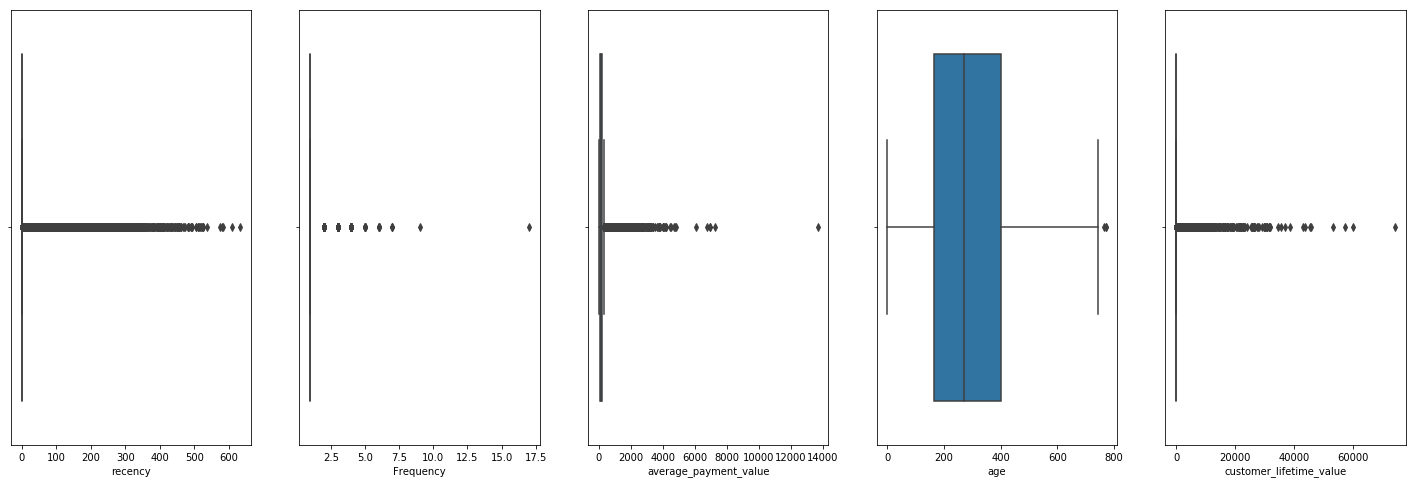

In [25]:
fig, axs = plt.subplots(ncols=5,figsize=(25,8))
sns.boxplot(dataset.recency,ax=axs[0])
sns.boxplot(x=dataset.Frequency,ax=axs[1])
sns.boxplot(x=dataset.average_payment_value,ax=axs[2])
sns.boxplot(x=dataset.age,ax=axs[3])
sns.boxplot(x=dataset.customer_lifetime_value,ax=axs[4])

In [26]:
bins = [0, 1000, 2000,4000,14000]
names = ['<1000', '1000-2000','2000-4000','4000-14000']

dataset['avg_payment_value_range'] = pd.cut(dataset['average_payment_value'], bins, labels=names)

In [27]:
dataset.avg_payment_value_range.value_counts()

<1000         94960
1000-2000       920
2000-4000       196
4000-14000       17
Name: avg_payment_value_range, dtype: int64

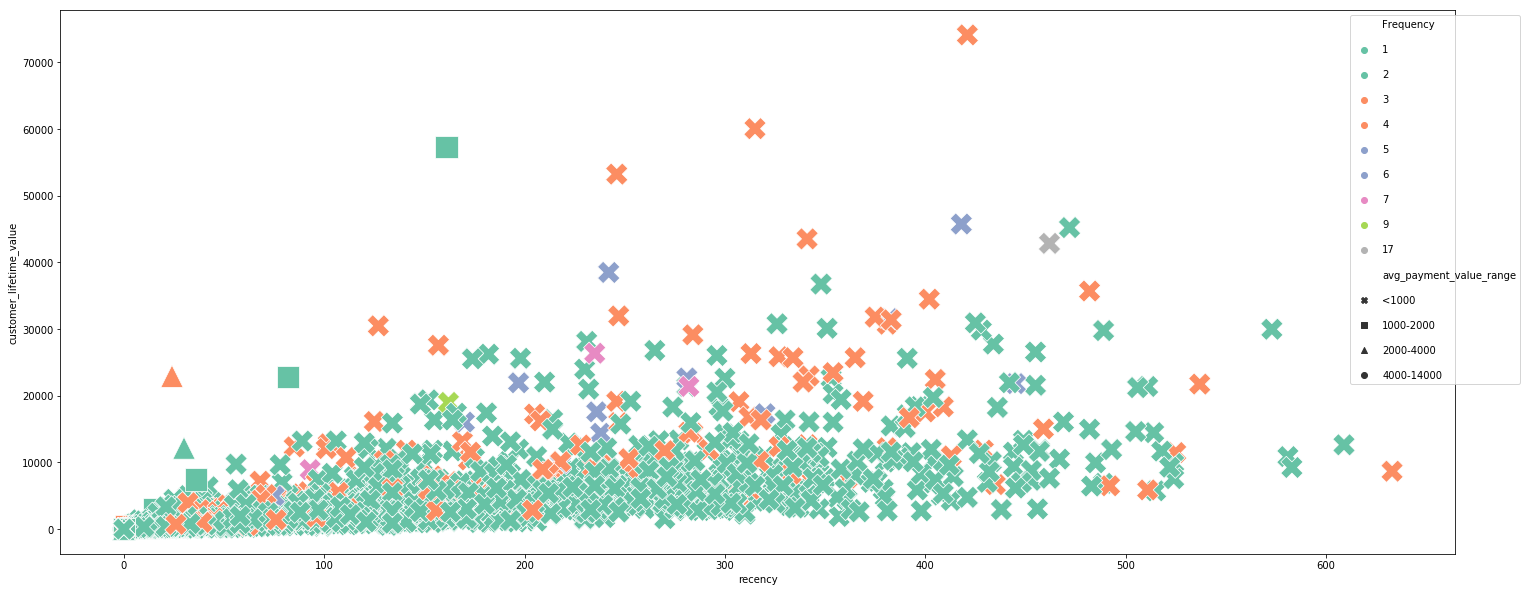

In [28]:
fig,ax = plt.subplots(figsize=(25,10))
markers = {"<1000": "X", "1000-2000": "s","2000-4000":"^","4000-14000":"o"}
sns.scatterplot(x='recency',y='customer_lifetime_value',hue='Frequency',s=500,style='avg_payment_value_range',markers=markers,palette="Set2",data=dataset,legend ='full')
ax.legend(labelspacing=1.5,bbox_to_anchor=(1.05, 1))

### Frequency/Recency analysis using the BG/NBD model

For the CLV models, the following nomenclature is used:
1. Frequency represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases.
2. T represents the age of the customer in whatever time units chosen (daily, in our dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.
3. Recency represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)

#### Assumptions : 
1. While active, transactions made by a customer in time period t is Poisson distributed with mean λt.
2. Differences in transaction rate between customers follows a gamma distribution with shape r and scale α
3. Each customer becomes inactive after each transaction with probability p
4. Differences in p follows a beta distribution with shape parameters a and b
5. Transaction rate and dropout probability vary independently between customers

Reference Link - http://benalexkeen.com/bg-nbd-model-for-customer-base-analysis-in-python/

In [30]:
ordersData = customer_orders[['customer_unique_id','order_purchase_timestamp']]

In [31]:
print(ordersData.order_purchase_timestamp.max())
print(ordersData.order_purchase_timestamp.min())

2018-10-17
2016-09-04


In [32]:
from lifetimes.utils import summary_data_from_transaction_data
summary = summary_data_from_transaction_data(ordersData, 'customer_unique_id', 'order_purchase_timestamp', observation_period_end='2018-10-17')

In [33]:
summary.head()

,frequency,recency,T
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,160.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,163.0
0000f46a3911fa3c0805444483337064,0.0,0.0,586.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,370.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,337.0


In [34]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.011690,0.000513,0.010685,0.012696
alpha,42.669482,3.766750,35.286651,50.052312
a,2.750412,0.605346,1.563934,3.936890
b,0.394661,0.096024,0.206453,0.582869


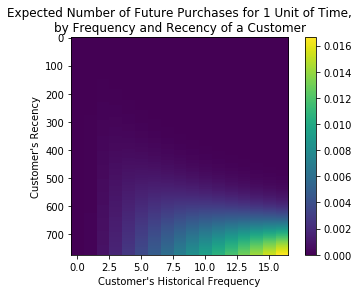

In [35]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf)

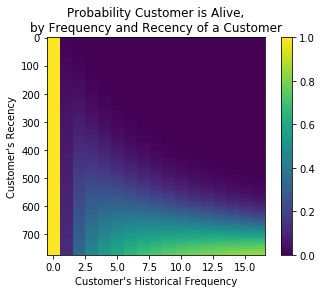

In [36]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)

In [37]:
t = 365
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T'])
summary.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,predicted_purchases
customer_unique_id,,,,
63cfc61cee11cbe306bff5857d00bfe4,5.0,382.0,524.0,0.527431
6469f99c1f9dfae7733b25662e7f1782,5.0,282.0,393.0,0.597525
394ac4de8f3acb14253c177f0e15bc58,4.0,236.0,299.0,0.731186
dc813062e0fc23409cd255f7f53c7074,5.0,418.0,473.0,0.968916
8d50f5eadf50201ccdcedfb9e2ac8455,16.0,462.0,520.0,2.802884


C:\Users\Pushkar\Anaconda3\lib\site-packages\lifetimes\generate_data.py:54: RuntimeWarning: overflow encountered in double_scalars
  next_purchase_in = random.exponential(scale=1.0 / l)
C:\Users\Pushkar\Anaconda3\lib\site-packages\lifetimes\generate_data.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  next_purchase_in = random.exponential(scale=1.0 / l)


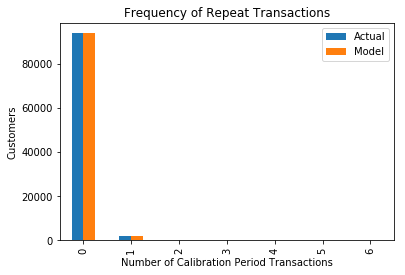

In [38]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [40]:
mv = dataset[['customer_unique_id','average_payment_value']].set_index('customer_unique_id')

In [41]:
summaryFinal = pd.merge(mv,summary,left_on = mv.index, right_on = summary.index).set_index('key_0')

In [42]:
summaryFinal.head()

,average_payment_value,frequency,recency,T,predicted_purchases
key_0,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,0.0,0.0,160.0,0.012659
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0.0,0.0,163.0,0.012539
0000f46a3911fa3c0805444483337064,86.22,0.0,0.0,586.0,0.005485
0000f6ccb0745a6a4b88665a16c9f078,43.62,0.0,0.0,370.0,0.007656
0004aac84e0df4da2b147fca70cf8255,196.89,0.0,0.0,337.0,0.008154


In [43]:
summaryFinal.rename(columns={'average_payment_value':'monetary_value'},inplace=True)

In [44]:
summaryFinal[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.00000,-0.00522
frequency,-0.00522,1.00000


In [45]:
summaryFinal = summaryFinal[summaryFinal.frequency>0]

In [46]:
summaryFinal.head()

,monetary_value,frequency,recency,T,predicted_purchases
key_0,,,,,
00172711b30d52eea8b313a7f2cced02,122.070,1.0,16.0,81.0,0.066999
004288347e5e88a27ded2bb23747066c,177.185,1.0,171.0,447.0,0.029743
004b45ec5c64187465168251cd1c9c2f,73.860,1.0,267.0,411.0,0.047656
0058f300f57d7b93c477a131a59b36c3,87.790,1.0,31.0,240.0,0.025502
00a39521eb40f7012db50455bf083460,61.625,1.0,11.0,147.0,0.033985


In [47]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0.001)
ggf.fit(summaryFinal['frequency'],
        summaryFinal['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2149 subjects, p: 11.29, q: 1.45, v: 10.57>


In [49]:
print(ggf.conditional_expected_average_profit(
        summaryFinal['frequency'],
        summaryFinal['monetary_value']
    ).sort_values().tail(10))

key_0
525cda9909aa001ebed396f6e55eae01     867.346817
0341bbd5c969923a0f801b9e2d10a7b8     971.570684
906a8a4ec9f3d4c3e64fa6d1c4fe6009     981.753641
73601b1eec55943e90ce8d61253d5c09    1004.744624
c8460e4251689ba205045f3ea17884a1    1129.399311
eae0a83d752b1dd32697e0e7b4221656    1348.181448
58c1b085b54c03a1f1ab5f13d64c2b1c    1483.622473
59d66d72939bc9497e19d89c61a96d5f    1721.739248
055ec572ac7f3c7bdd04a183830ebe59    1958.807918
46450c74a0d8c5ca9395da1daac6c120    3127.123461
dtype: float64


In [50]:
bgf.fit(summaryFinal['frequency'], summaryFinal['recency'], summaryFinal['T'])

print(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    summaryFinal['frequency'],
    summaryFinal['recency'],
    summaryFinal['T'],
    summaryFinal['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
).sort_values().tail(10))

key_0
af5454198a97379394cacf676e1e96cb     88.005854
ca77025e7201e3b30c44b472ff346268     98.681642
394ac4de8f3acb14253c177f0e15bc58    106.132997
d132b863416f85f2abb1a988ca05dd12    106.314269
8d50f5eadf50201ccdcedfb9e2ac8455    136.770124
397b44d5bb99eabf54ea9c2b41ebb905    140.890092
fe81bb32c243a86b2f86fbf053fe6140    151.270521
dc813062e0fc23409cd255f7f53c7074    167.294268
4facc2e6fbc2bffab2fea92d2b4aa7e4    218.777656
46450c74a0d8c5ca9395da1daac6c120    942.208595
Name: clv, dtype: float64
